In [1]:
#import libraries

import twitter
from twitter import api
import tweepy
import re
import csv
from textblob import TextBlob
import numpy as np
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [2]:
#API Credentials
consumer_key = "xxxxxxxxxxxx" 
consumer_secret = "yyyyyyyyy"
access_key = "zzzzzzzz"
access_secret = "wwwwwwwww"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_key, access_secret) 
api = tweepy.API(auth)

In [3]:
searchTerm=(input('Enter the search term:') + " -filter:retweets" + " filter:media")
numSearch= int(input('Enter the no. of Tweets to be crawled : '))


Enter the search term:trump
Enter the no. of Tweets to be crawled : 600


In [4]:
#Tweet Crawling
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
data=[]
#Text Cleaning
for tweet in tweepy.Cursor(api.search,q=searchTerm , lang="en", rpp = 10).items(numSearch):
    msg = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', tweet.text)
    msg = re.sub("^b'", " ", msg)
    msg = msg.lower() #lower case    
    msg = msg.strip('\'"')
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    corpus.append(msg)
    a=TextBlob(msg)
    b=a.sentiment.polarity
    if(b>0):
        c=['Positive',msg.encode('utf-8')]
        data.append(c)
    elif(b<0):
        c=['Negative',msg.encode('utf-8')]
        data.append(c)
    else:
        c=['Neutral',msg.encode('utf-8')]
        data.append(c)




In [5]:
df=pd.DataFrame(data,columns=['Sentiment','Tweet'])
df.head(10)

,Sentiment,Tweet
0,Neutral,b'lemon trump defend lap conspiraci theori'
1,Neutral,b'well sh q nut work done prove trump skill pla'
2,Neutral,b'donald j trump call total complet shutdown s...
3,Neutral,b'like women lisa blom paid make accus trump'
4,Neutral,b'donal trump got scare someon said allahu akb...
5,Neutral,b'nightmar world scenario donald trump would d...
6,Positive,b'obama mess clean trump'
7,Neutral,b'offer moscowmitch mcconnel simpli like kapo ...
8,Neutral,b'donald trump bigcityjj100'
9,Neutral,b'bewar drink koolaid trump cult like support ...


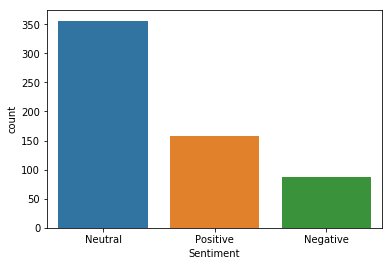

In [6]:
#Exploratory Data Analysis
sns.countplot(df['Sentiment'])

In [7]:
# Creating the Bag of Words model


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(corpus).toarray()
y = df.iloc[:, 0].values

In [8]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

# SVM

In [9]:
from sklearn.svm import SVC

svc = SVC(random_state=21)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy1))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 64.17


# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy2))

Accuracy: 69.17


# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy3 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy3))

Accuracy: 60.00


# Decision tree

In [12]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=21)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy4 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy4))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 85.00
              precision    recall  f1-score   support

    Negative       0.64      0.69      0.67        13
     Neutral       0.87      0.94      0.90        77
    Positive       0.91      0.70      0.79        30

   micro avg       0.85      0.85      0.85       120
   macro avg       0.81      0.78      0.79       120
weighted avg       0.85      0.85      0.85       120



# Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=21)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy5 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy5))

Accuracy: 84.17


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# XGBoost

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=21)
model3= xgb.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy6 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy6))


Accuracy: 84.17


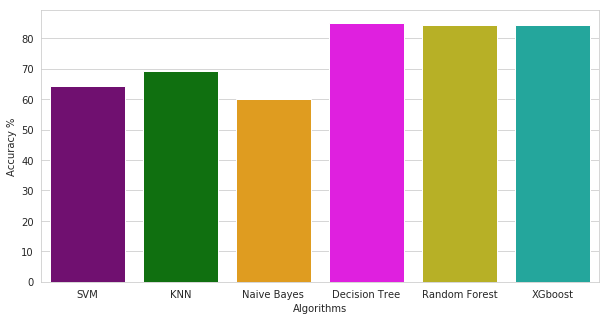

In [15]:
#Algorithm Visualisation
methods = ["SVM","KNN", "Naive Bayes", "Decision Tree", "Random Forest", "XGboost"]
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6 ]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

# Oversampling
As data is imbalanced

In [17]:
from imblearn.combine import SMOTETomek

In [18]:
smk = SMOTETomek(random_state=42)
x_res, y_res = smk.fit_sample(x_train,y_train)

In [19]:
print(x_res.shape)
print(y_res.shape)

(837, 1886)
(837,)


In [20]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=21)
rf.fit(x_res, y_res)
y_pred = rf.predict(x_test)
accuracy4 = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}" .format(accuracy4))
report = classification_report(y_test, y_pred, labels=None)
print(report)

Accuracy: 81.67
              precision    recall  f1-score   support

    Negative       0.75      0.46      0.57        13
     Neutral       0.79      0.97      0.87        77
    Positive       1.00      0.57      0.72        30

   micro avg       0.82      0.82      0.82       120
   macro avg       0.85      0.67      0.72       120
weighted avg       0.84      0.82      0.80       120

